여러분은 왜 개 사료가 예상보다 빨리 상하게 되는지를 파악하기위해 개 사료 회사에 고용되었습니다. 안 좋은 소식은 이 회사는 한동안 장비를 업그레이드 하지 않았습니다. 즉, 이 회사에서 사용하는 5가지 방부제의 사용 용량이 중구난방이라는 뜻입니다. 하지만 그 중에서 가장 많은 영향을 끼치는 것이 무엇일까요?<br>
이 회사에서는 먼저 4가지 방부제(A, B, C, D)가 함유된 방부제 묶음을 섞은 뒤 '필러'라는 화학물질로 마무리합니다. 식품과학자들은 A, B, C, D 방부제 중 하나가 문제를 일으키고 있다고 생각하지만, 그게 어떤 것인지 명확하게 하기위해 여러분이 고용됐습니다. "랜덤포레스트"로 어떤 방부제가 사료를 빨리 상하게 하는지 찾아보세요!

- Pres_A : 혼합물의 A비율
- Pres_B : 혼합물의 B비율
- Pres_C : 혼합물의 C비율
- Pres_D : 혼합물의 D비율
- Spoiled : 개 사료가 상했는지 여부를 나타내는 레이블.

**시나리오에서 요구하는 바를 고려하여, 머신러닝을 이용해서 문제를 풀어보세요.**

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import mglearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./data/dog_food.csv")

In [3]:
df.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A        490 non-null    int64  
 1   B        490 non-null    int64  
 2   C        490 non-null    float64
 3   D        490 non-null    int64  
 4   Spoiled  490 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.3 KB


In [5]:
df.describe()

,A,B,C,D,Spoiled
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,5.534694,5.504082,9.126531,5.579592,0.285714
std,2.951520,2.853797,2.055545,2.854837,0.452216
min,1.000000,1.000000,5.000000,1.000000,0.000000
25%,3.000000,3.000000,8.000000,3.000000,0.000000
50%,5.000000,6.000000,9.000000,6.000000,0.000000
75%,8.000000,8.000000,11.000000,8.000000,1.000000
max,10.000000,10.000000,14.000000,10.000000,1.000000


### 상관계수 확인

In [6]:
df.corr()

,A,B,C,D,Spoiled
A,1.000000,0.007267,0.057588,-0.045834,0.059973
B,0.007267,1.000000,-0.117222,-0.036436,-0.086474
C,0.057588,-0.117222,1.000000,-0.034477,0.858620
D,-0.045834,-0.036436,-0.034477,1.000000,-0.016067
Spoiled,0.059973,-0.086474,0.858620,-0.016067,1.000000


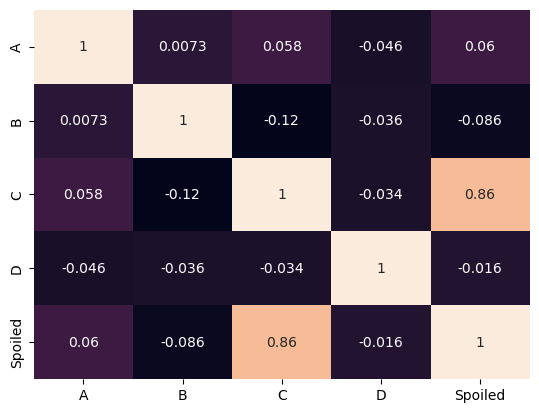

In [7]:
sns.heatmap(df.corr(), # 데이터 프레임
           annot = True, # 데이터 값 표시 여부, 정수형 포맷
           cbar = False) # 컬러바 표시 여부

plt.show()

- 상관계수 확인 시 C 방부제 외의 변수들은 상관성이 적은 것이 확인됨

### 히스토그램 C값으로만 표시

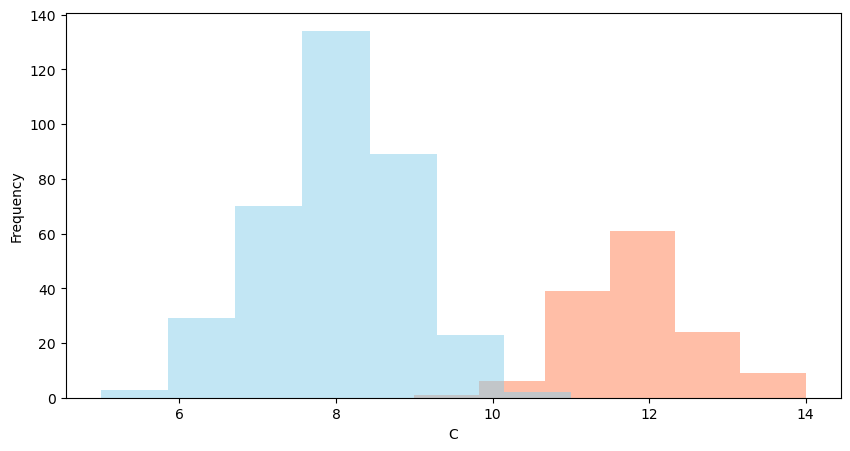

In [8]:
df.loc[df["Spoiled"] == 1]["C"].plot(kind = "hist", bins = 6, color = "coral", alpha = 0.5, figsize = (10, 5))
df.loc[df["Spoiled"] == 0]["C"].plot(kind = "hist", bins = 7, color = "skyblue", alpha = 0.5, figsize = (10, 5))

plt.xlabel("C")
plt.show()

- C에 따른 Spoiled의 히스토그램. 하늘색이 0, 주황색이 1
- C 값이 낮을 수록 0에 속하는 경우가 많은 것이 확인된다

### 데이터 분할

In [9]:
x = df.drop("Spoiled", axis = 1)
y = df["Spoiled"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

### 의사결정나무 시도

In [11]:
dt = DecisionTreeClassifier(max_depth = 5, random_state = 7)
dt.fit(x, y)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9872448979591837
0.9795918367346939


In [12]:
dt.fit(x, y)

DecisionTreeClassifier(max_depth=5, random_state=7)

In [13]:
dt.score(x, y)

0.9857142857142858

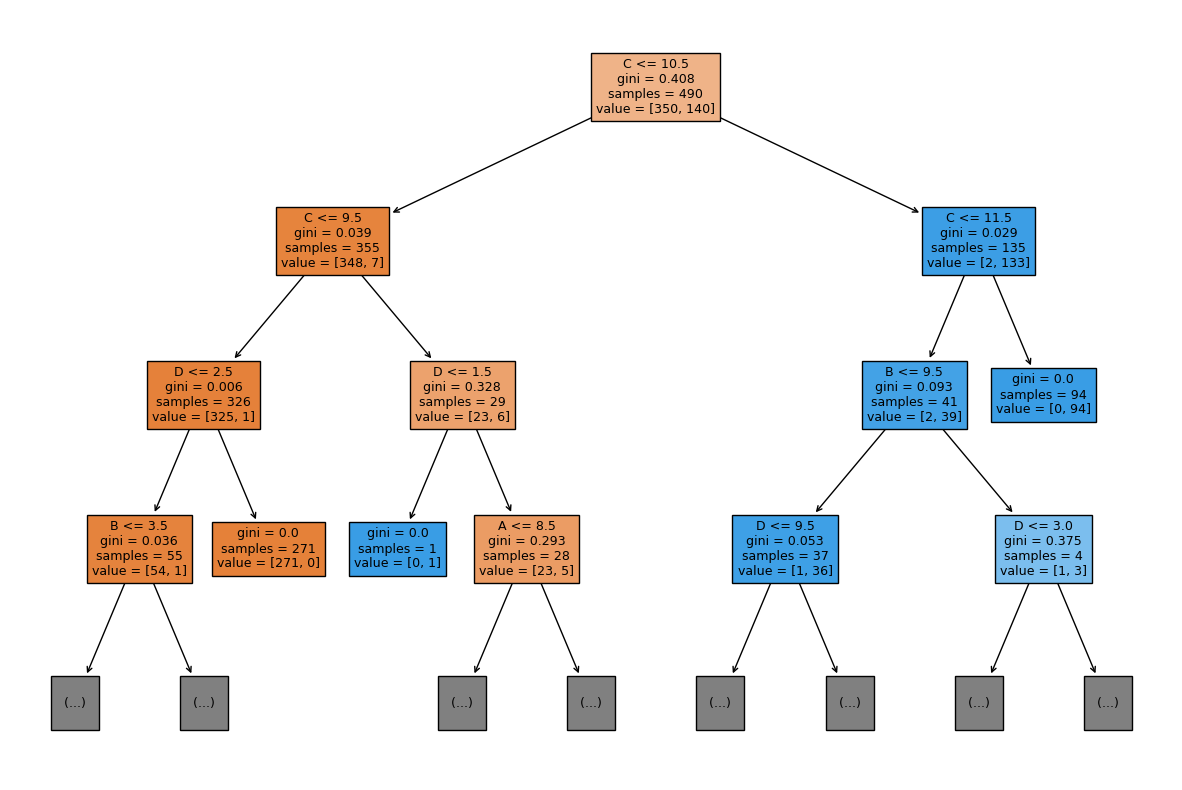

In [14]:
plt.figure(figsize = (15, 10))
plot_tree(dt, max_depth = 3, filled = True, feature_names = ["A", "B", "C", "D"])
plt.show()

In [15]:
print(dt.feature_importances_)

[0.00255426 0.00893455 0.96862246 0.01988873]


- 의사결정나무는 봐도 뭐가 중요한지 해석이 잘 못하겠음...
- feature_importances 찍어보면 C가 의사결정 근거의 대부분을 차지하고 5% 미만으로 나머지 반영되는 것을 확인할 수 있음 

### 로지스틱 회귀 시도

- A, B, C, D의 값이 서로 크게 다르지 않기 때문에 스케일링 미적용하여 시도

In [16]:
logi = LogisticRegression()

In [17]:
logi.fit(x, y)

LogisticRegression()

In [18]:
logi.score(x, y)

0.9816326530612245

In [19]:
logi.coef_

array([[-0.06477485, -0.05487038,  3.29746416, -0.12598962]])

- 로지스틱 회귀식의 계수값을 확인할 결과 C의 계수가 크게는 50배 이상, 적게는 25배 정도 큰 영향력을 가진 것이 확인됨

### 랜덤포레스트 시도

In [20]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 7)

In [21]:
rf.fit(x, y)

RandomForestClassifier(n_jobs=-1, random_state=7)

In [22]:
rf.score(x, y)

0.9959183673469387

In [23]:
rf.feature_importances_

array([0.03155795, 0.03159752, 0.90446152, 0.032383  ])

- 랜덤포레스트 기법 시도 시 C 피처의 중요도가 90% 이상인 것이 확인된다

### 엑스트라 포레스트 시도

In [24]:
et = ExtraTreesClassifier(n_jobs = -1, random_state = 7)

In [25]:
et.fit(x, y)

ExtraTreesClassifier(n_jobs=-1, random_state=7)

In [26]:
et.score(x, y)

0.9959183673469387

In [27]:
et.feature_importances_

array([0.03413031, 0.03173886, 0.89463619, 0.03949464])

### 그레디언트 부스팅 시도

In [28]:
gb = GradientBoostingClassifier(random_state = 7)

In [29]:
gb.fit(x, y)

GradientBoostingClassifier(random_state=7)

In [30]:
gb.score(x, y)

0.9959183673469387

In [31]:
gb.feature_importances_

array([0.00467939, 0.00525818, 0.96979962, 0.02026281])

### SGDClassifier 시도

In [32]:
sgd = SGDClassifier(loss = "log_loss", max_iter = 300, random_state = 7)

In [33]:
sgd.fit(x, y)

SGDClassifier(loss='log_loss', max_iter=300, random_state=7)

In [34]:
sgd.score(x, y)

0.9387755102040817

In [35]:
sgd.coef_

array([[-0.32015079,  2.68691314, 88.50081286, -1.45135667]])

#### hinge로 시도

In [36]:
sgd_hinge = SGDClassifier(loss = "hinge", max_iter = 300, tol = None, random_state = 7)

In [37]:
sgd_hinge.fit(x, y)

SGDClassifier(max_iter=300, random_state=7, tol=None)

In [38]:
sgd_hinge.score(x, y)

0.963265306122449

In [39]:
sgd_hinge.coef_

array([[-1.48649653, -0.60811222, 81.89244522, -1.75676863]])